In [4]:
#!pip install --user top2vec

In [1]:
import pyodbc 
import pandas as pd
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DLRBIMSQL;'
                      'Database=ClarityIndex;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()

In [2]:
query = """ SELECT [RoomId],[RoomName],[ItemId],[Category],[Name],[Type] 
FROM [ClarityIndex].[dbo].[PQ_RoomContents] 
where RoomName LIKE '%bathroom%' or RoomName LIKE '%toliet%' or RoomName LIKE '%restroom%' order by RoomId"""

In [3]:
RC = pd.read_sql_query(query,conn)

In [4]:
#len(RC.drop_duplicates(['BuildingID']))

In [5]:
RC

,RoomId,RoomName,ItemId,Category,Name,Type
0,-1005825708:3658021,RESTROOM,-1005825708:3602967,Doors,Door_Generic_Door_DLR,Door_Generic_Door_DLR
1,-1005825708:3658021,RESTROOM,-1005825708:3657975,Doors,Door_Generic_Door_DLR,Door_Generic_Door_DLR
2,-1005825708:3658023,RESTROOM,-1005825708:3657976,Doors,Door_Generic_Door_DLR,Door_Generic_Door_DLR
3,-1005825708:3658023,RESTROOM,-1005825708:3657974,Doors,Door_Generic_Door_DLR,Door_Generic_Door_DLR
4,-1005825708:3658023,RESTROOM,-1005825708:3603015,Doors,Door_Generic_Door_DLR,Door_Generic_Door_DLR
...,...,...,...,...,...,...
67270,-998543429:705004,CHANGE/RESTROOM,1424475438:3387277,Windows,BMS_Window_Glass Panel_face based_3 vert mullions,"BMS_Window_Glass Panel_face 3'-7 5/8"" x 2'-1 3/4"""
67271,-998543429:705004,CHANGE/RESTROOM,-998543429:9113790,Lighting Fixtures,+BMS_LT_Generic_Recessed_6 inch can light,+BMS_LT_Generic_Recessed_6 inch can light_dry ...
67272,-998543429:705004,CHANGE/RESTROOM,-998543429:9114583,Lighting Fixtures,+BMS_LT_Generic_Recessed_6 inch can light,+BMS_LT_Generic_Recessed_6 inch can light_dry ...
67273,-998543429:705004,CHANGE/RESTROOM,-998543429:9114343,Lighting Fixtures,+BMS_LT_Generic_Recessed_6 inch can light,+BMS_LT_Generic_Recessed_6 inch can light_dry ...


In [6]:
RC['BuildingID']=RC['RoomId'].str.split(':').str[0]

In [129]:
RC['Name2']=RC['Name'].str.lower().str.replace('\d+','').str.replace("_"," ").str.replace("-"," ").str.replace('\+','').\
    str.replace('american standard','').replace('accessible','acc').str.replace('grab bar','grabbar').str.replace('lght','light').\
    str.lstrip().str.rstrip('-').str.rstrip()

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [138]:
RC['Name3']=RC['Name'].str.lower().str.replace('\d+','').str.replace("_"," ").str.replace("-"," ").str.replace('\+',' ').\
    str.lstrip().str.rstrip('-').str.rstrip()

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [140]:
RC['Name3'][0:50]

0                                 door generic door dlr
1                                 door generic door dlr
2                                 door generic door dlr
3                                 door generic door dlr
4                                 door generic door dlr
5                                 door generic door dlr
6                                dlr grabbar wc side gb
7                            dlr int flushpanel alframe
8                              dlr lavatory wallmounted
9                      dlr wc flush valve floor mounted
10                                                    .
11                               dlr grabbar wc back gb
12                               dlr grabbar wc back gb
13                     dlr wc flush valve floor mounted
14                                                    .
15                                           dlr mirror
16                           dlr grabbar wc vertical gb
17                              dlr dispenser so

In [8]:
def get_ngrams(series: pd.Series,n:int):
    ngrams = series.copy().str.split(' ').explode()
    ngrams1 = series.copy().str.split(' ').explode()
    for i in range(1,n):
        foo=ngrams1.groupby(level=0).shift(-i)
        ngrams=ngrams.str.cat(foo,sep=' ')
    ngrams = ngrams.dropna()
    return pd.DataFrame(ngrams)

def get_multigrams(series,n):
    grams=get_ngrams(series,1)
    if n==1:
        return grams
    else:
        for i in range(1,n+1):
            if i==1:
                continue
            grams=grams.append(get_ngrams(series,i))
    return grams

In [9]:
def get_multigrams(series,n):
    grams=get_ngrams(series,1)
    if n==1:
        return grams
    else:
        for i in range(1,n+1):
            if i==1:
                continue
            grams=grams.append(get_ngrams(series,i))
    return grams

In [10]:
import nltk

In [11]:
def tokenlenfilter(tokenlist,minlen=2):
    tokens = [x for x in tokenlist if len(x)>minlen]
    return (tokens)

In [231]:
def tokennamefilter(tokenlist,minlen=2):
    tokens = [x for x in tokenlist if x not in ['mod','bradley','corp','pdx','generic','tpb','modd','kohler','sloan','bobrick','lucerne','dlr','dyson']]
    return (tokens)

In [13]:
import nltk
lemmatizer = nltk.stem.WordNetLemmatizer()
   
def lemmatize_text(tokenlist):
    return [lemmatizer.lemmatize(w) for w in tokenlist]


In [14]:
def tokensort(val):
    return val.sort()

In [15]:
def lemmer(text):
    from nltk.corpus import wordnet as wn
    from nltk.stem.wordnet import WordNetLemmatizer
    from nltk import pos_tag
    from collections import defaultdict
    lemma_function = WordNetLemmatizer()

    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV

    return [lemma_function.lemmatize(token, tag_map[tag[0]]) for token, tag in pos_tag(text)]

In [16]:
def posfilter(tokens):
    from nltk.corpus import wordnet as wn
    from nltk import pos_tag
    from collections import defaultdict
   
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    
    return [i for i,j in pos_tag(tokens) if tag_map[j[0]]=='n']

In [232]:
RC['NameFilter']=RC['Name2'].apply(nltk.word_tokenize).apply(tokenlenfilter).apply(tokennamefilter)

In [233]:
RC['NameFilter']=RC['NameFilter'].apply(lemmer)

In [234]:
for i  in RC['NameFilter']:
    if len(i)<3:
        i.sort()

In [235]:
RC['NameFilter']=RC['NameFilter'].apply(' '.join).str.lstrip()

In [236]:
len(RC['Name'].value_counts())

2285

In [237]:
len(RC['NameFilter'].value_counts())

1760

In [238]:
buildingadjusted=list(RC.drop_duplicates(subset=['BuildingID','NameFilter'])['NameFilter'].value_counts()[RC.drop_duplicates(subset=['BuildingID','NameFilter'])['NameFilter'].value_counts()>40].index.values)

In [239]:
len(buildingadjusted)

21

In [240]:
buildingadjusted

['back grabbar',
 'grabbar side',
 'toilet tissue dispenser',
 'grabbar vertical',
 'sanitary napkin disposal',
 'flush valve wall mount',
 'mirror',
 'ada lavatory',
 'dispenser soap wall',
 'door int hmframe',
 'toilet stall standard',
 'toilet stall accessible partition',
 'urinal face host',
 'wheel chair circle',
 'screen urinal',
 '',
 'clearance lavatory',
 'drain floor',
 'toilet stall accessible front',
 'dispenser paper towel wall surface',
 'rectangular transition angle']

In [26]:
#def tokennameswap(tokenlist,minlen=2):
#    tokens = ['accessible' for x in tokenlist if x =='acc']
#    return (tokens)

In [241]:
catframe=RC.drop_duplicates(subset=['RoomId','Category']).\
    assign(n=1).groupby(['Category'])['n'].sum().\
    reset_index().query('n > 0').sort_values(['n'],ascending=False)


In [28]:
catframe['PercentCoverage']=catframe["n"]/len(RC.drop_duplicates(subset=['RoomId']))

In [29]:
catframe

,Category,n,PercentCoverage
24,Plumbing Fixtures,2070,0.885751
7,Doors,1578,0.675225
27,Specialty Equipment,1544,0.660676
17,Lighting Fixtures,1189,0.508772
15,Generic Models,1132,0.484382
2,Casework,695,0.297390
0,Air Terminals,650,0.278134
11,Electrical Fixtures,425,0.181857
12,Fire Alarm Devices,313,0.133932
9,Duct Fittings,312,0.133504


In [30]:
bigcats=list(catframe[catframe.PercentCoverage>=.1].Category)

In [31]:
get_ngrams(RC[RC['Category'].isin(bigcats)].\
           drop_duplicates(subset=['RoomId','NameFilter'])['NameFilter'],1).\
           assign(n=1).groupby(['NameFilter'])['n'].sum().\
           reset_index().query('n>100').sort_values(['n'],ascending=False).tail(30)

,NameFilter,n
824,roll,145
858,sensor,145
867,shaver,144
675,narrow,143
1047,troffer,142
901,smoke,141
214,corp,140
683,non,138
72,aws,134
1102,wallmounted,132


In [32]:
RC[RC['Category'].isin(bigcats)].drop_duplicates(subset=['RoomId','NameFilter'])['NameFilter'].\
    value_counts().reset_index().query('NameFilter>50')

,index,NameFilter
0,grabbar side,999
1,back grabbar,999
2,toilet tissue dispenser,908
3,flush valve wall mount,901
4,grabbar vertical,770
...,...,...
113,mirror single fixture,53
114,shower,51
115,water closet clearance toekick,51
116,lavatory wall mount,51


In [33]:
RC[RC['Category'].isin(bigcats)][RC['NameFilter'].isin(buildingadjusted)].drop_duplicates(subset=['RoomId','NameFilter']).\
    assign(n=1).groupby(['Category','NameFilter'])['n'].sum().\
    reset_index().query('n > 50').sort_values(['Category','n'],ascending=False).\
    drop_duplicates(subset=['NameFilter'])

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Category,NameFilter,n
24,Specialty Equipment,back grabbar,985
29,Specialty Equipment,grabbar side,985
37,Specialty Equipment,toilet tissue dispenser,820
30,Specialty Equipment,grabbar vertical,758
31,Specialty Equipment,mirror,686
32,Specialty Equipment,sanitary napkin disposal,510
27,Specialty Equipment,dispenser soap wall,389
39,Specialty Equipment,wheel chair circle,322
25,Specialty Equipment,clearance lavatory,277
26,Specialty Equipment,dispenser paper towel wall surface,169


In [34]:
TrimmedSet=RC.drop_duplicates(subset=['RoomId','NameFilter']).\
    assign(n=1).groupby(['Category','NameFilter'])['n'].sum().\
    reset_index().query('n > 50').sort_values(['Category','n'],ascending=False)

In [35]:
TrimmedSet

,Category,NameFilter,n
1790,Structural Framing,flange wide,78
1765,Sprinklers,sprinkler,83
1431,Specialty Equipment,back grabbar,985
1561,Specialty Equipment,grabbar side,985
1738,Specialty Equipment,toilet tissue dispenser,820
...,...,...,...
151,Casework,vanity long single,69
1,Air Terminals,air grille return round,309
0,Air Terminals,accesspanel air,173
20,Air Terminals,exhaust grille ceiling unhosted,86


In [36]:
TrimmedSet.to_csv('C:\\Users\dmckenzie\documents\CleanedBathrooms.csv',index=False)

In [37]:
len(RC['Name'].value_counts())-len(RC['NameFilter'].value_counts())

521

In [38]:
RC['NameFilter'].value_counts()[0:30]

flush valve wall mount                                2501
toilet tissue dispenser                               2481
sanitary napkin disposal                              1659
mirror                                                1341
                                                      1336
back grabbar                                          1279
grabbar side                                          1266
air grille return round                               1237
toilet stall standard                                 1103
grabbar vertical                                      1060
ada lavatory                                           997
downlight light                                        910
dispenser soap wall                                    762
tile                                                   639
light track                                            629
accesspanel air                                        617
seat cover dispenser surface mount                     6

In [39]:
RC['NameFilter'].value_counts()[RC['NameFilter'].value_counts()>10]

flush valve wall mount                       2501
toilet tissue dispenser                      2481
sanitary napkin disposal                     1659
mirror                                       1341
                                             1336
                                             ... 
grabbar side ligature resistant                11
bibb hose                                      11
surface troffer face                           11
plumbing trapanddrain                          11
toilet tissue dispenser multi roll recess      11
Name: NameFilter, Length: 575, dtype: int64

In [40]:
RC.drop_duplicates(subset=['RoomId','NameFilter'])['NameFilter'].value_counts()

back grabbar                         999
grabbar side                         999
toilet tissue dispenser              908
flush valve wall mount               901
grabbar vertical                     770
                                    ... 
duplex pump skid                       1
refrigerator undercounter              1
akt fra concrete rectangular beam      1
luxspace surface mouted dnc            1
imeg standard downlight                1
Name: NameFilter, Length: 1764, dtype: int64

In [41]:
RC['Category'].value_counts()

Specialty Equipment       20048
Plumbing Fixtures         16316
Lighting Fixtures          6765
Generic Models             5797
Pipe Fittings              4035
Air Terminals              2949
Doors                      2504
Duct Fittings              1599
Casework                   1018
Electrical Fixtures         833
Fire Alarm Devices          754
Structural Framing          593
Lighting Devices            561
Sprinklers                  425
Mechanical Equipment        319
Furniture                   260
Duct Accessories            256
Curtain Wall Mullions       137
Structural Columns           82
Pipe Accessories             76
Windows                      75
Communication Devices        32
Structural Foundations       16
Data Devices                 12
Electrical Equipment         10
Cable Tray Fittings           7
Site                          6
Parking                       2
Security Devices              1
Furniture Systems             1
Conduit Fittings              1
Planting

In [42]:
from gensim.models import Word2Vec

In [43]:
RC['Name2Tokens']=RC['Name2'].apply(nltk.word_tokenize)

In [198]:
sentences=RC[RC['NameFilter']!=''].drop_duplicates(subset=['Name2'])['NameFilter'].apply(nltk.word_tokenize).tolist()

In [199]:
namelines=RC[RC['NameFilter']!=''].drop_duplicates(subset=['Name2'])['NameFilter']

In [200]:
model = Word2Vec(sentences, min_count=1)

In [201]:
import numpy as np

In [202]:
def sent_vectorizer(sent, model=model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

In [203]:
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, model))

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [204]:
from sklearn.manifold import TSNE
 
model2 = TSNE(random_state=0,n_components=3)
Y=model2.fit_transform(X)

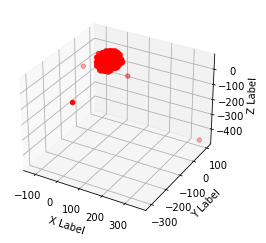

In [205]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =Y[:,0]
y =Y[:,1]
z =Y[:,2]



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [206]:
import matplotlib.pyplot as plt

In [207]:
import umap

In [208]:
import seaborn as sns

In [209]:
from sklearn import cluster
from sklearn import metrics

In [210]:
reducer = umap.UMAP( n_components=3)
embedding = reducer.fit_transform(X)
embedding.shape

(2033, 3)

In [211]:
bedded=pd.DataFrame({'X1':embedding[:, 0],'X2':embedding[:, 1]})

In [212]:
kmeans = cluster.KMeans(n_clusters=20)
kmeans.fit(bedded)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [213]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=.1, min_samples=2).fit(bedded)
clustering.labels_

array([ 0,  1,  2, ..., 73, 47, 10], dtype=int64)

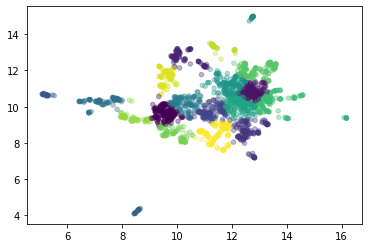

In [214]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],s=20,alpha=.35,c=labels)

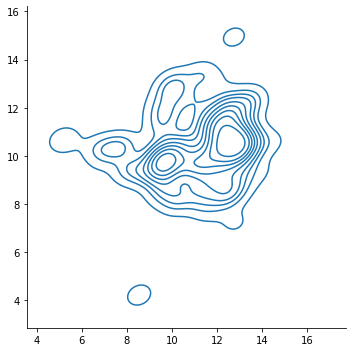

In [215]:
sns.displot( x=embedding[:, 0], y=embedding[:, 1],  kind="kde")

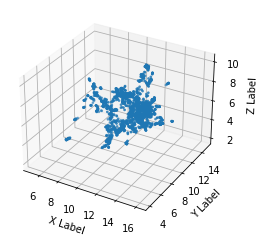

In [216]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =embedding[:,0]
y =embedding[:,1]
z =embedding[:,2]



ax.scatter(x, y, z,s=3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [217]:
x =embedding[:,0]
y =embedding[:,1]
z =embedding[:,2]
bedded2=pd.DataFrame({'X1':x,"X2":y,"X3":z})

In [255]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=.2, min_samples=5).fit(bedded2)
clustering.labels_.astype('str')

array(['0', '1', '2', ..., '66', '43', '-1'], dtype='<U21')

In [193]:
#!pip install --upgrade pip

In [192]:
#!pip install hdbscan

In [256]:
import plotly.express as px 
  
df = px.data.iris() 
  
fig = px.scatter_3d( x = embedding[:,0],  
                    y = embedding[:,1],  
                    z = embedding[:,2],
                    opacity=0.7,
                    hover_name=namelines, 
                    color=clustering.labels_.astype('str')) 
fig.update_traces(marker=dict(size=4),
                  selector=dict(mode='markers'))
  
fig.show()

In [259]:
pd.DataFrame(clustering.labels_.astype('str')).value_counts()

-1    372
9     230
41     50
65     50
34     40
     ... 
52      5
43      5
39      5
94      5
93      4
Length: 96, dtype: int64

In [260]:
fig.write_html("UMAPTest.html")

In [196]:
RC[RC['NameFilter'].str.contains('bobrick')]

,RoomId,RoomName,ItemId,Category,Name,Type,BuildingID,Name2,NameFilter,Name2Tokens,Name3


In [132]:
RC['Name2']

0        door generic door dlr
1        door generic door dlr
2        door generic door dlr
3        door generic door dlr
4        door generic door dlr
                 ...          
65487        bench locker room
65488    single side dispenser
65489    single side dispenser
65490              ada grabbar
65491              ada grabbar
Name: Name2, Length: 65492, dtype: object

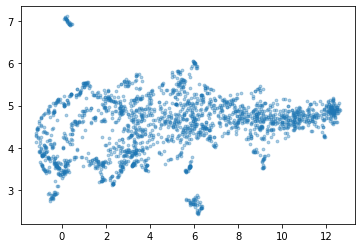

In [114]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],s=8,alpha=.35)

In [218]:
#RC['VECS']=RC['Name2Tokens'].apply(sent_vectorizer)